# Chicago Crimes Data Visualization in R

In [1]:
#Load Required Libraries
library(dplyr)
library(leaflet)
library(tidyr)
library(readr)
library(sqldf)
library(ggplot2)  ##plotting
library(scales)    ##tuning plots
library(stringr)
library(anytime)   ##fixing time and dates
library(rgdal)      ##maps


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite

Attaching package: 'scales'

The following object is masked from 'package:readr':

    col_factor

Loading required package: sp
rgdal: version: 1.4-3, (SVN revision 828)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: C:/Users/Spectre/Documents/R/win-library/3.6/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/Users/Spectre/Documents/R/win-library/3.6/rgdal/proj
 Linking to sp version: 1.3-1 


In [7]:
getwd()

[1] "C:/Users/Spectre/Desktop/Chicago/crimes"

In [5]:
setwd("C:/Users/Spectre/Desktop/Chicago/crimes")

In [9]:
##A. INTRO-read csv

crime<- read_csv("Chicago_Crimes_2012_to_2017.csv")


Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  .default = col_double(),
  `Case Number` = col_character(),
  Date = col_character(),
  Block = col_character(),
  IUCR = col_character(),
  `Primary Type` = col_character(),
  Description = col_character(),
  `Location Description` = col_character(),
  Arrest = col_logical(),
  Domestic = col_logical(),
  `FBI Code` = col_character(),
  `Updated On` = col_character(),
  Location = col_character()
)
See spec(...) for full column specifications.


X1   ID       Case Number Date                   Block                IUCR
1    3 10508693 HZ250496    05/03/2016 11:40:00 PM 013XX S SAWYER AVE   0486
2   89 10508695 HZ250409    05/03/2016 09:40:00 PM 061XX S DREXEL AVE   0486
3  197 10508697 HZ250503    05/03/2016 11:31:00 PM 053XX W CHICAGO AVE  0470
4  673 10508698 HZ250424    05/03/2016 10:10:00 PM 049XX W FULTON ST    0460
5  911 10508699 HZ250455    05/03/2016 10:00:00 PM 003XX N LOTUS AVE    0820
6 1108 10508702 HZ250447    05/03/2016 10:35:00 PM 082XX S MARYLAND AVE 041A
  Primary Type           Description             Location Description Arrest
1 BATTERY                DOMESTIC BATTERY SIMPLE APARTMENT             TRUE 
2 BATTERY                DOMESTIC BATTERY SIMPLE RESIDENCE            FALSE 
3 PUBLIC PEACE VIOLATION RECKLESS CONDUCT        STREET               FALSE 
4 BATTERY                SIMPLE                  SIDEWALK             FALSE 
5 THEFT                  $500 AND UNDER          RESIDENCE            FALSE 
6 BATTERY                AGGRAVATED: HANDGUN     STREET               FALSE 
  ... Ward Community Area FBI Code X Coordinate Y Coordinate Year
1 ... 24   29             08B      1154907      1893681      2016
2 ... 20   42             08B      1183066      1864330      2016
3 ... 37   25             24       1140789      1904819      2016
4 ... 28   25             08B      1143223      1901475      2016
5 ... 28   25             06       1139890      1901675      2016
6 ...  8   44             04B      1183336      1850642      2016
  Updated On             Latitude Longitude Location                     
1 05/10/2016 03:56:50 PM 41.86407 -87.70682 (41.864073157, -87.706818608)
2 05/10/2016 03:56:50 PM 41.78292 -87.60436 (41.782921527, -87.60436317) 
3 05/10/2016 03:56:50 PM 41.89491 -87.75837 (41.894908283, -87.758371958)
4 05/10/2016 03:56:50 PM 41.88569 -87.74952 (41.885686845, -87.749515983)
5 05/10/2016 03:56:50 PM 41.88630 -87.76175 (41.886297242, -87.761750709)
6 05/10/2016 03:56:50 PM 41.74535 -87.60380 (41.745354023, -87.603798903)

In [ ]:
head(crime)

In [10]:
##remove missing geographical locations
data <- crime %>% drop_na(Latitude) %>% drop_na(Longitude) 
head(data)

X1   ID       Case Number Date                   Block                IUCR
1    3 10508693 HZ250496    05/03/2016 11:40:00 PM 013XX S SAWYER AVE   0486
2   89 10508695 HZ250409    05/03/2016 09:40:00 PM 061XX S DREXEL AVE   0486
3  197 10508697 HZ250503    05/03/2016 11:31:00 PM 053XX W CHICAGO AVE  0470
4  673 10508698 HZ250424    05/03/2016 10:10:00 PM 049XX W FULTON ST    0460
5  911 10508699 HZ250455    05/03/2016 10:00:00 PM 003XX N LOTUS AVE    0820
6 1108 10508702 HZ250447    05/03/2016 10:35:00 PM 082XX S MARYLAND AVE 041A
  Primary Type           Description             Location Description Arrest
1 BATTERY                DOMESTIC BATTERY SIMPLE APARTMENT             TRUE 
2 BATTERY                DOMESTIC BATTERY SIMPLE RESIDENCE            FALSE 
3 PUBLIC PEACE VIOLATION RECKLESS CONDUCT        STREET               FALSE 
4 BATTERY                SIMPLE                  SIDEWALK             FALSE 
5 THEFT                  $500 AND UNDER          RESIDENCE            FALSE 
6 BATTERY                AGGRAVATED: HANDGUN     STREET               FALSE 
  ... Ward Community Area FBI Code X Coordinate Y Coordinate Year
1 ... 24   29             08B      1154907      1893681      2016
2 ... 20   42             08B      1183066      1864330      2016
3 ... 37   25             24       1140789      1904819      2016
4 ... 28   25             08B      1143223      1901475      2016
5 ... 28   25             06       1139890      1901675      2016
6 ...  8   44             04B      1183336      1850642      2016
  Updated On             Latitude Longitude Location                     
1 05/10/2016 03:56:50 PM 41.86407 -87.70682 (41.864073157, -87.706818608)
2 05/10/2016 03:56:50 PM 41.78292 -87.60436 (41.782921527, -87.60436317) 
3 05/10/2016 03:56:50 PM 41.89491 -87.75837 (41.894908283, -87.758371958)
4 05/10/2016 03:56:50 PM 41.88569 -87.74952 (41.885686845, -87.749515983)
5 05/10/2016 03:56:50 PM 41.88630 -87.76175 (41.886297242, -87.761750709)
6 05/10/2016 03:56:50 PM 41.74535 -87.60380 (41.745354023, -87.603798903)

In [11]:
##remove space from column names
names(data) = gsub(" ", "", names(data))
names(data)

[1] "X1"                  "ID"                  "CaseNumber"         
 [4] "Date"                "Block"               "IUCR"               
 [7] "PrimaryType"         "Description"         "LocationDescription"
[10] "Arrest"              "Domestic"            "Beat"               
[13] "District"            "Ward"                "CommunityArea"      
[16] "FBICode"             "XCoordinate"         "YCoordinate"        
[19] "Year"                "UpdatedOn"           "Latitude"           
[22] "Longitude"           "Location"

In [12]:
data1 = sqldf("Select PrimaryType , 
                  count(*) as frequency 
                  from data group by PrimaryType")

##B. plot crime type against frequency to find the highest type of crime
           ##factoring data to plot


In [13]:
PrimaryType <- factor(data1$PrimaryType, levels = data1$PrimaryType)

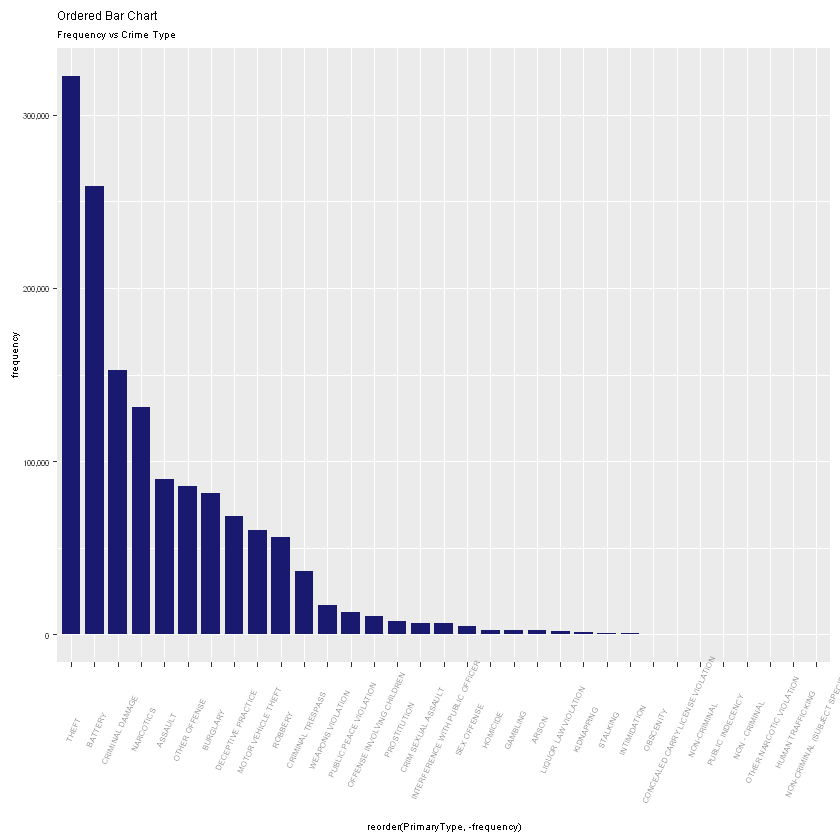

In [14]:
## Draw plot
data1<- sqldf("Select * 
                  from data1
                  order by frequency DESC")


ggplot(data1, aes(x=reorder(PrimaryType, -frequency), y=frequency)) + 
  geom_bar(stat="identity", width=0.8, fill="#191970") + 
  labs(title="Ordered Bar Chart", 
       subtitle="Frequency vs Crime Type") + scale_y_continuous(labels=comma)+
  theme(axis.text.x=element_text(angle=65, vjust=0.6),
        text = element_text(size=6))

In [15]:
##c. crime percentage PIE chart
    ##C.1. for theft
data2 <- sqldf("Select PrimaryType, Arrest, count(Arrest) as afrequency 
                  from data 
                  where PrimaryType='THEFT'
                  group by Arrest")

##converting to percentage and adding to original dataframe

In [16]:
percentage <- data2$afrequency / sum(data2$afrequency) * 100
data2<-cbind(data2,percentage)

In [17]:
##convert arrest logical to character
str(data2)
data2$Arrest <- as.character(data2$Arrest)
data2$percentage <-round(data2$percentage, digits = 0)
mycols <- c("#0073C2FF", "#EFC000FF")

'data.frame':	2 obs. of  4 variables:
 $ PrimaryType: chr  "THEFT" "THEFT"
 $ Arrest     : logi  FALSE TRUE
 $ afrequency : int  286129 36304
 $ percentage : num  88.7 11.3


List of 28
 $ line                      : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ rect                      : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ text                      :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0pt 0pt 0pt 0pt
  .. ..- attr(*, "valid.unit")= int 8
  .. ..- attr(*, "unit")= chr "pt"
  ..$ debug        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ axis.title                : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.text                 : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.ticks.length         : 'unit' num 0pt
  ..- attr(*, "valid.un

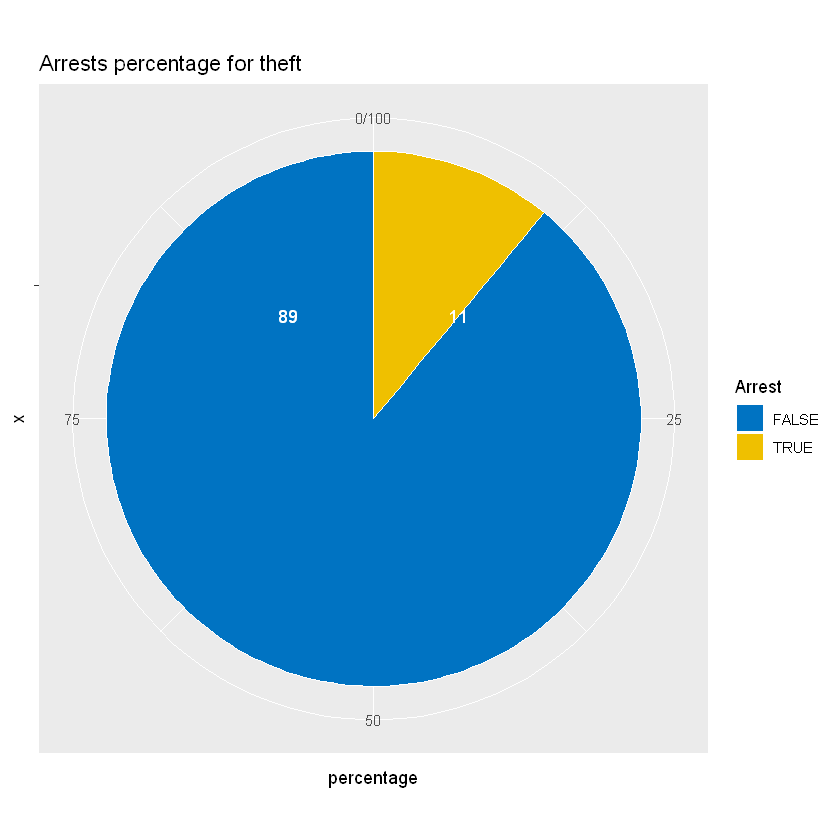

In [18]:
##plot
ggplot(data2, aes(x = "", y = percentage, fill = Arrest)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y", start = 0)+
  geom_text(aes( label =percentage), color = "white")+
  scale_fill_manual(values = mycols) + 
  labs(title="Arrests percentage for theft")
  theme_void()

In [19]:
##C.2. crime percentage pie chart
  data4 <- sqldf("Select PrimaryType, Arrest, count(Arrest) as nfrequency 
                  from data 
                  where PrimaryType='NARCOTICS'
                  group by Arrest")

In [20]:
##converting to percentage and adding to original dataframe
  
  percentage2 <- data4$nfrequency / sum(data4$nfrequency) * 100
  data4<-cbind(data4,percentage2)

'data.frame':	2 obs. of  4 variables:
 $ PrimaryType: chr  "NARCOTICS" "NARCOTICS"
 $ Arrest     : logi  FALSE TRUE
 $ nfrequency : int  903 130281
 $ percentage2: num  0.688 99.312


List of 28
 $ line                      : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ rect                      : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ text                      :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0pt 0pt 0pt 0pt
  .. ..- attr(*, "valid.unit")= int 8
  .. ..- attr(*, "unit")= chr "pt"
  ..$ debug        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ axis.title                : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.text                 : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.ticks.length         : 'unit' num 0pt
  ..- attr(*, "valid.un

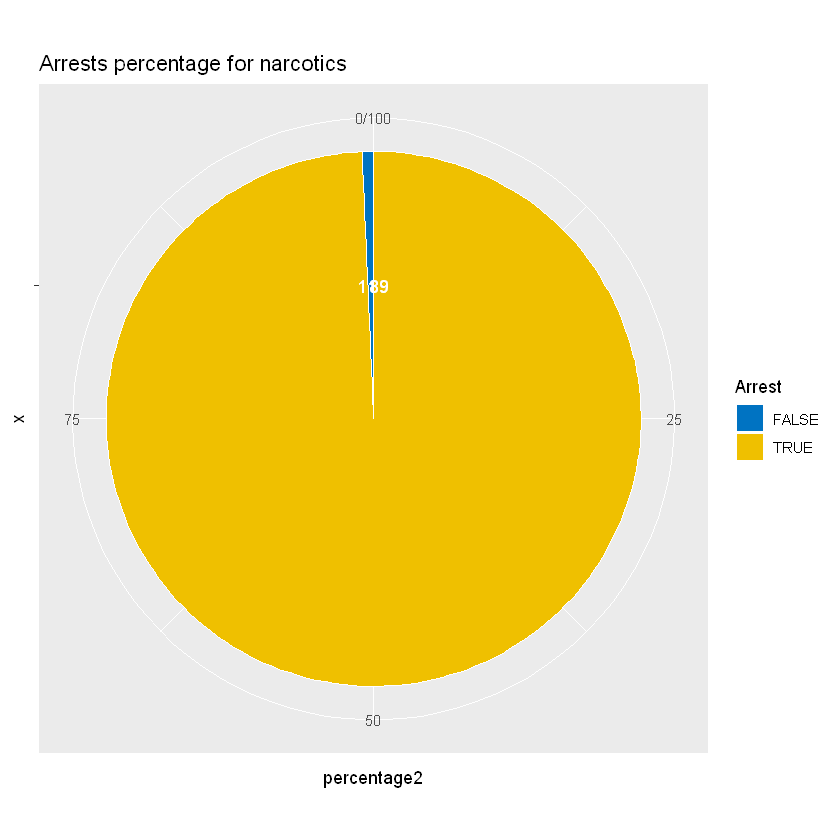

In [21]:
##convert arrest logical to character
  str(data4)
  data4$Arrest <- as.character(data4$Arrest)
  
  data4$percentage2 <-round(data4$percentage2, digits = 0)
  

  mycols <- c("#0073C2FF", "#EFC000FF")
  
  ggplot(data2, aes(x = "", y = percentage2, fill = Arrest)) +
    geom_bar(width = 1, stat = "identity", color = "white") +
    coord_polar("y", start = 0)+
    geom_text(aes( label =percentage), color = "white")+
    scale_fill_manual(values = mycols) + 
    labs(title="Arrests percentage for narcotics")
  theme_void()

In [23]:
         ##C.3. crime battery

  ##crime percentage pie chart
  data5 <- sqldf("Select PrimaryType, Arrest, count(Arrest) as nfrequency 
                  from data 
                  where PrimaryType='BATTERY'
                  group by Arrest")
  data5
  

PrimaryType Arrest nfrequency
1 BATTERY     FALSE  198946    
2 BATTERY      TRUE   59999

##converting to percentage and adding to original dataframe

'data.frame':	2 obs. of  4 variables:
 $ PrimaryType: chr  "BATTERY" "BATTERY"
 $ Arrest     : logi  FALSE TRUE
 $ nfrequency : int  198946 59999
 $ percentage3: num  76.8 23.2


List of 28
 $ line                      : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ rect                      : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ text                      :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0pt 0pt 0pt 0pt
  .. ..- attr(*, "valid.unit")= int 8
  .. ..- attr(*, "unit")= chr "pt"
  ..$ debug        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ axis.title                : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.text                 : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.ticks.length         : 'unit' num 0pt
  ..- attr(*, "valid.un

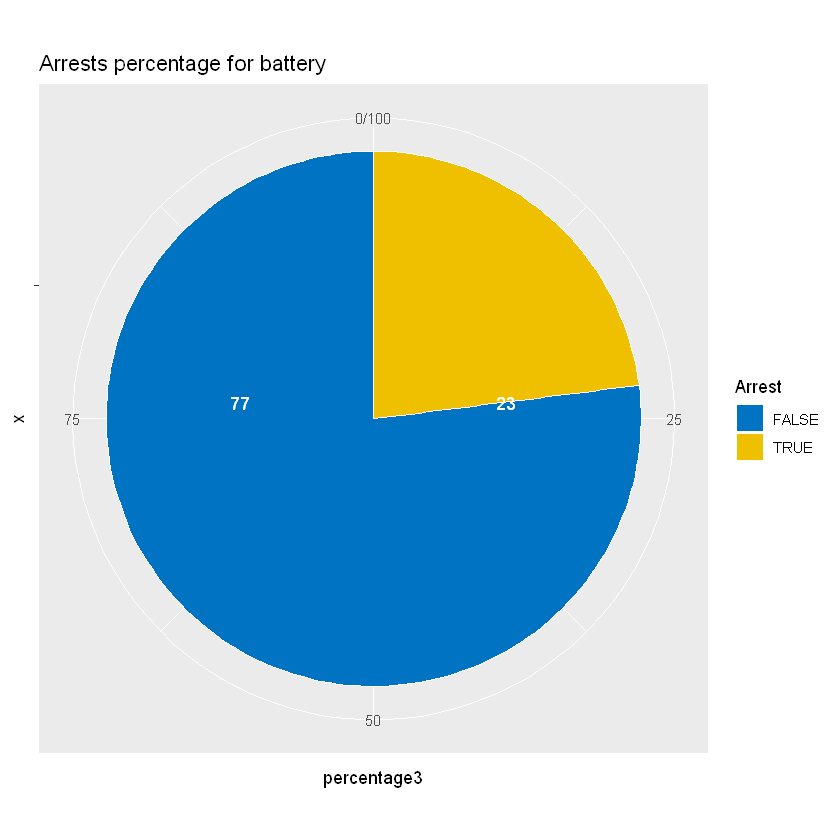

In [24]:
percentage3 <- data5$nfrequency / sum(data5$nfrequency) * 100
  data5<-cbind(data5,percentage3)
  ##convert arrest logical to character
  str(data5)
  data5$Arrest <- as.character(data5$Arrest)
  
  data5$percentage3 <-round(data5$percentage3, digits = 0)
  
  mycols <- c("#0073C2FF", "#EFC000FF")
  
  ggplot(data5, aes(x = "", y = percentage3, fill = Arrest)) +
    geom_bar(width = 1, stat = "identity", color = "white") +
    coord_polar("y", start = 0)+
    geom_text(aes( label =percentage3), color = "white")+
    scale_fill_manual(values = mycols) + 
    labs(title="Arrests percentage for battery")
  theme_void()
  

In [32]:
      ##C.4. Criminal damage arrest percentage PIE CHART
        
  data6 <- sqldf("Select PrimaryType, Arrest, count(Arrest) as nfrequency 
                  from data 
                  where PrimaryType='CRIMINAL DAMAGE'
                  group by Arrest")
  data6

PrimaryType     Arrest nfrequency
1 CRIMINAL DAMAGE FALSE  142740    
2 CRIMINAL DAMAGE  TRUE   10077

In [33]:
##converting to percentage and adding to original dataframe
  
  percentage4 <- data6$nfrequency / sum(data6$nfrequency) * 100
  data6<-cbind(data6,percentage4)

In [34]:
##convert arrest logical to character
  str(data6)
  data6$Arrest <- as.character(data6$Arrest)
  data6$percentage4 <-round(data6$percentage4, digits = 0)
  mycols <- c("#0073C2FF", "#EFC000FF")

'data.frame':	2 obs. of  4 variables:
 $ PrimaryType: chr  "CRIMINAL DAMAGE" "CRIMINAL DAMAGE"
 $ Arrest     : logi  FALSE TRUE
 $ nfrequency : int  142740 10077
 $ percentage4: num  93.41 6.59


List of 28
 $ line                      : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ rect                      : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ text                      :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0pt 0pt 0pt 0pt
  .. ..- attr(*, "valid.unit")= int 8
  .. ..- attr(*, "unit")= chr "pt"
  ..$ debug        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ axis.title                : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.text                 : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.ticks.length         : 'unit' num 0pt
  ..- attr(*, "valid.un

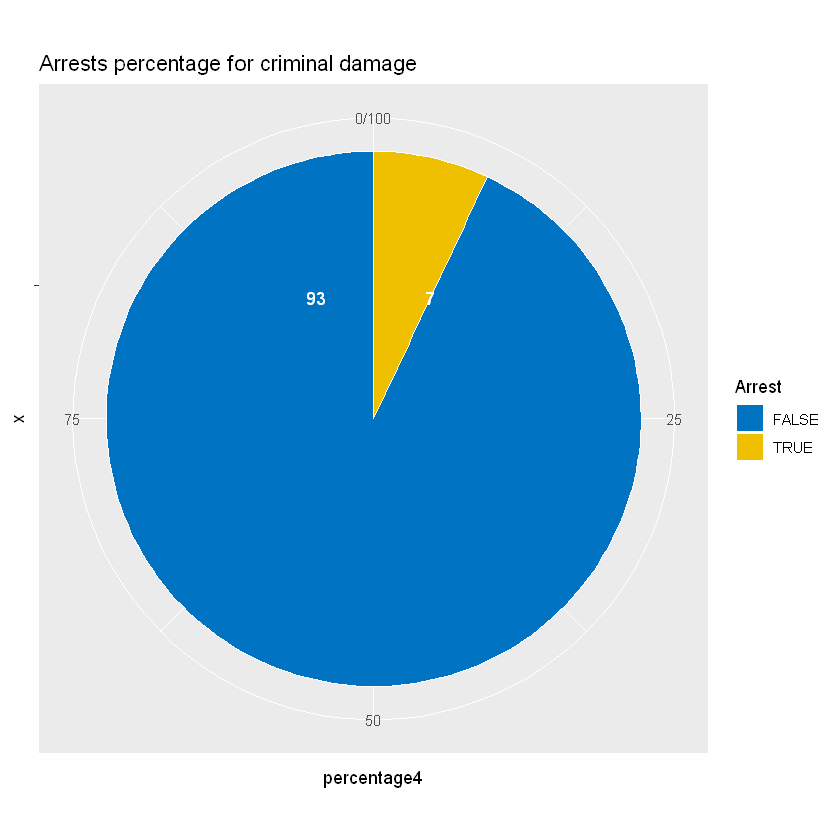

In [35]:
 ggplot(data6, aes(x = "", y = percentage4, fill = Arrest)) +
    geom_bar(width = 1, stat = "identity", color = "white") +
    coord_polar("y", start = 0)+
    geom_text(aes( label =percentage4), color = "white")+
    scale_fill_manual(values = mycols) + 
    labs(title="Arrests percentage for criminal damage")
  theme_void()

In [36]:
  ##D. PERFORMING TIME SERIES ANALYSIS
  
          ##fix date format of main data
  data$Date<-as.Date(data$Date, "%m/%d/%Y %H:%M:%S")
  t<-format(as.Date(data$Date), "%Y-%m")
  data<-cbind(data,t)   ##create date with month and year view
         ##change time from factor to Date before sql query 
str(data$t)
data$t<-anydate(data$t)
View(data$t)

 Factor w/ 61 levels "2012-01","2012-02",..: 53 53 53 53 53 53 53 53 53 53 ...


ERROR: Error in View(data$t): 'View()' not yet supported in the Jupyter R kernel


In [38]:
         ##D.1. Theft Frequency based on Month and Year
theft <- sqldf ("Select  t, count(*) AS tfreq
                  from data 
                  where PrimaryType='THEFT'
                  group by t
                  order by t ASC")

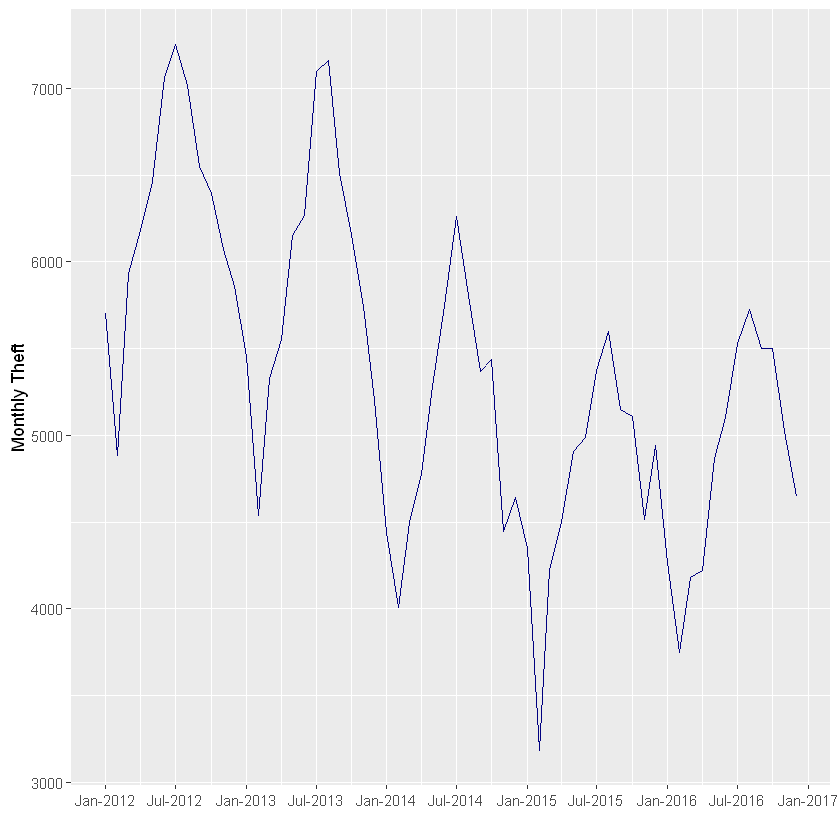

In [39]:
         ##plotting general theft trend with years passing by
ggplot(theft, aes(x=theft$t,y=theft$tfreq)) + geom_line(col="#000080") +
  scale_x_date(date_labels = "%b-%Y",breaks = pretty(theft$t, n = 10)) + xlab("") + ylab("Monthly Theft")+theme_grey()

In [40]:
            ##D.2. Narcotics Frequency based on Month and Year
narcotics <- sqldf ("Select  t, count(*) AS tfreq
                  from data 
                  where PrimaryType='NARCOTICS'
                  group by t
                  order by t ASC")

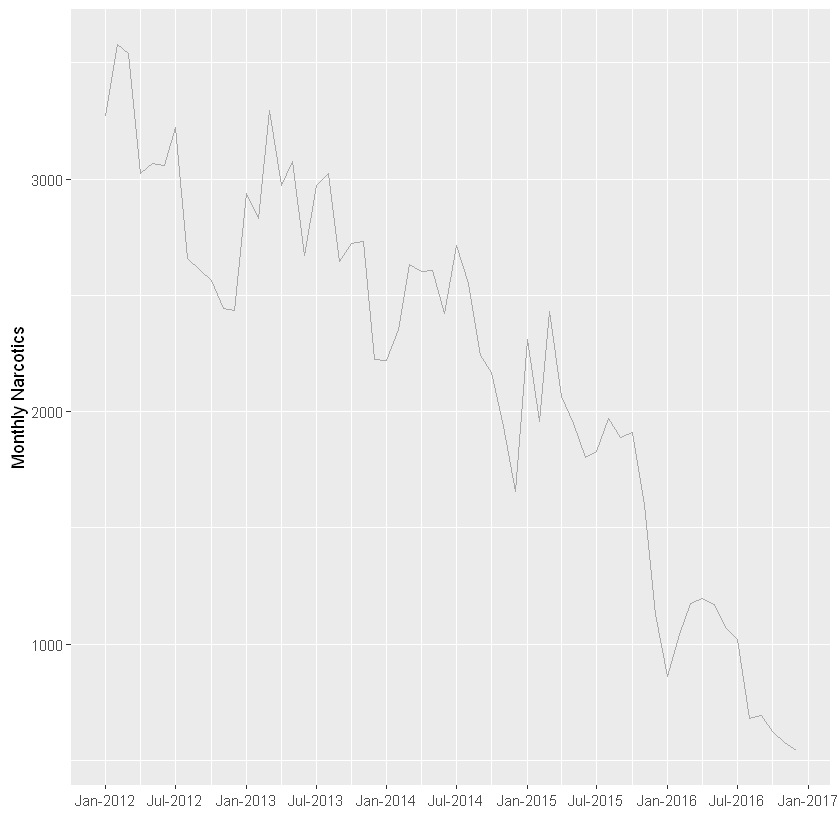

In [41]:
          ##plotting general narcotics trend with years passing by
ggplot(narcotics, aes(x=narcotics$t,y=narcotics$tfreq)) + geom_line(col="#A9A9A9") +
  scale_x_date(date_labels = "%b-%Y",breaks = pretty(narcotics$t, n = 10)) + xlab("") + ylab("Monthly Narcotics")+theme_grey()

In [42]:
          ##D.3. Battery Frequency based on Month and Year
battery <- sqldf ("Select  t, count(*) AS tfreq
                  from data 
                  where PrimaryType='BATTERY'
                  group by t
                  order by t ASC")

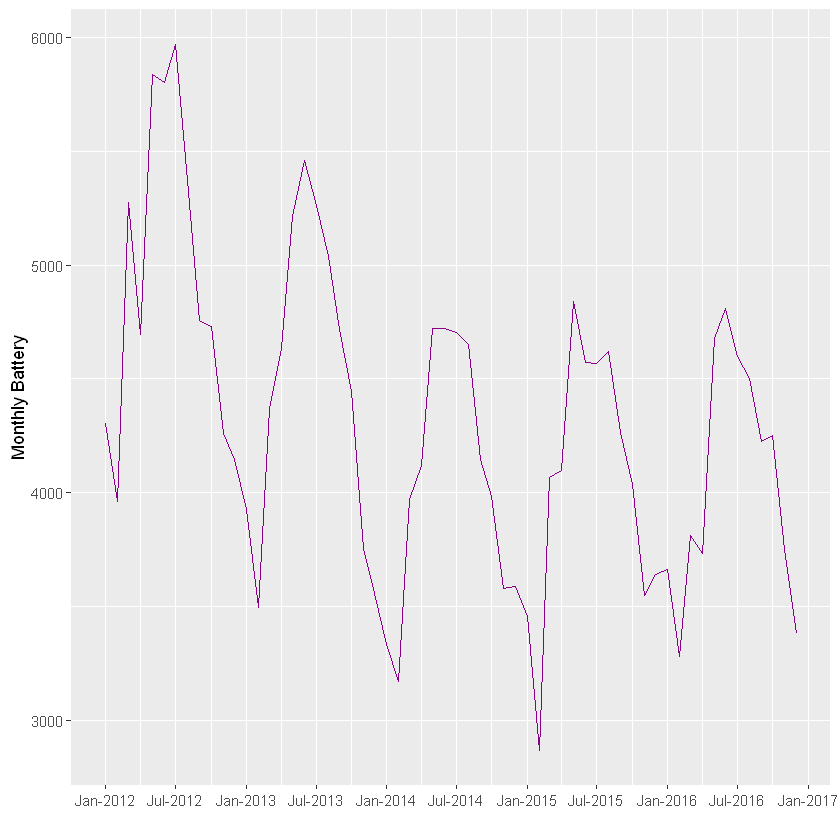

In [43]:
          ##plotting general battery trend with years passing by
ggplot(battery, aes(x=battery$t,y=battery$tfreq)) + geom_line(col="#8B008B") +
  scale_x_date(date_labels = "%b-%Y",breaks = pretty(battery$t, n = 10)) + xlab("") + ylab("Monthly Battery")+theme_grey()


In [44]:
            ##D.4. Criminal Damage Frequency based on Month and Year
criminaldamage <- sqldf ("Select  t, count(*) AS tfreq
                  from data 
                  where PrimaryType='CRIMINAL DAMAGE'
                  group by t
                  order by t ASC")

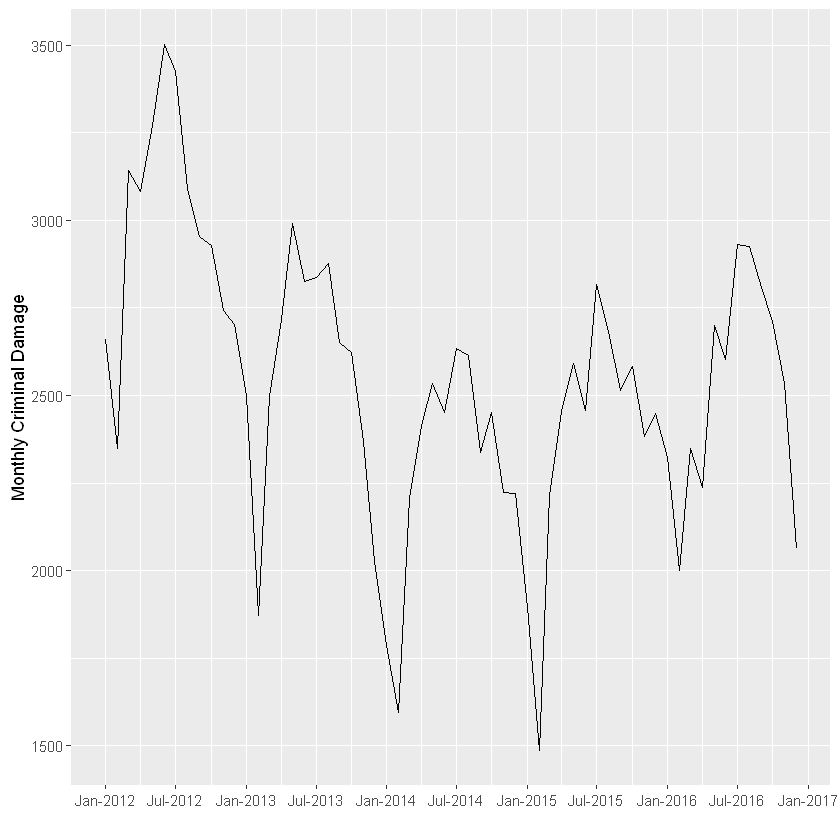

In [45]:
         ##plotting general criminal damage trend with years passing by
ggplot(criminaldamage, aes(x=criminaldamage$t,y=criminaldamage$tfreq)) + geom_line(col="#000000") +
  scale_x_date(date_labels = "%b-%Y",breaks = pretty(criminaldamage$t, n = 10)) + xlab("") + ylab("Monthly Criminal Damage")+theme_grey()

##E.BAR CHART For each Top 4 Crimes Chosen find the top 5 locations


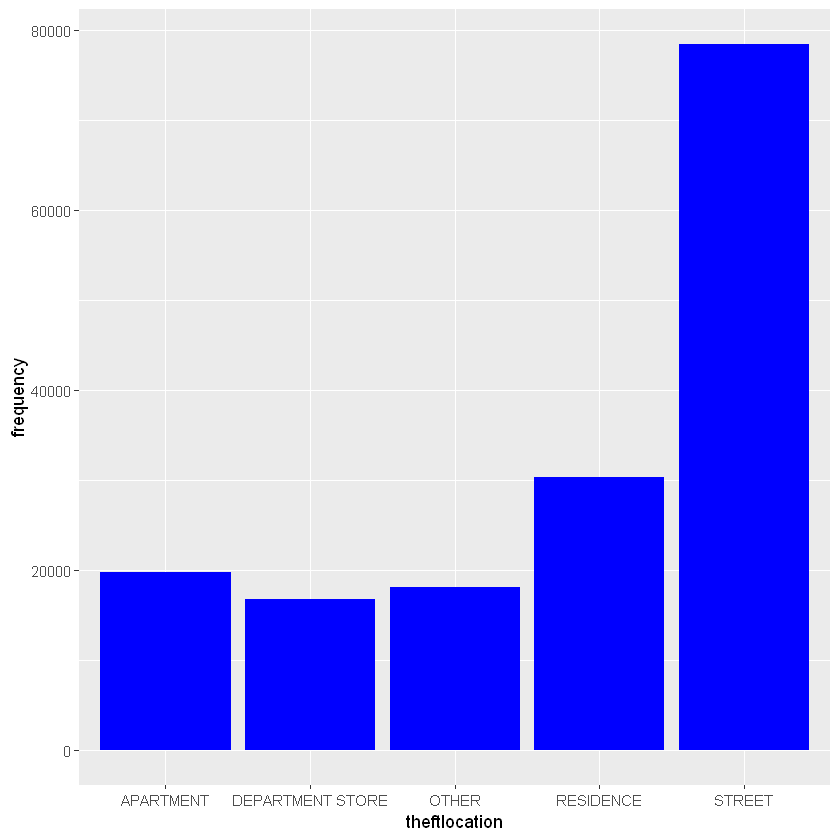

In [46]:
##E.1. theft top locations
theftloc = sqldf("Select LocationDescription as theftlocation, 
                  count(*) as frequency 
                  from data 
                  where PrimaryType='THEFT'
                   group by LocationDescription
                   order by frequency DESC
                limit 5")
ggplot(theftloc,aes(theftlocation,frequency))+geom_bar(stat='identity',fill="blue")

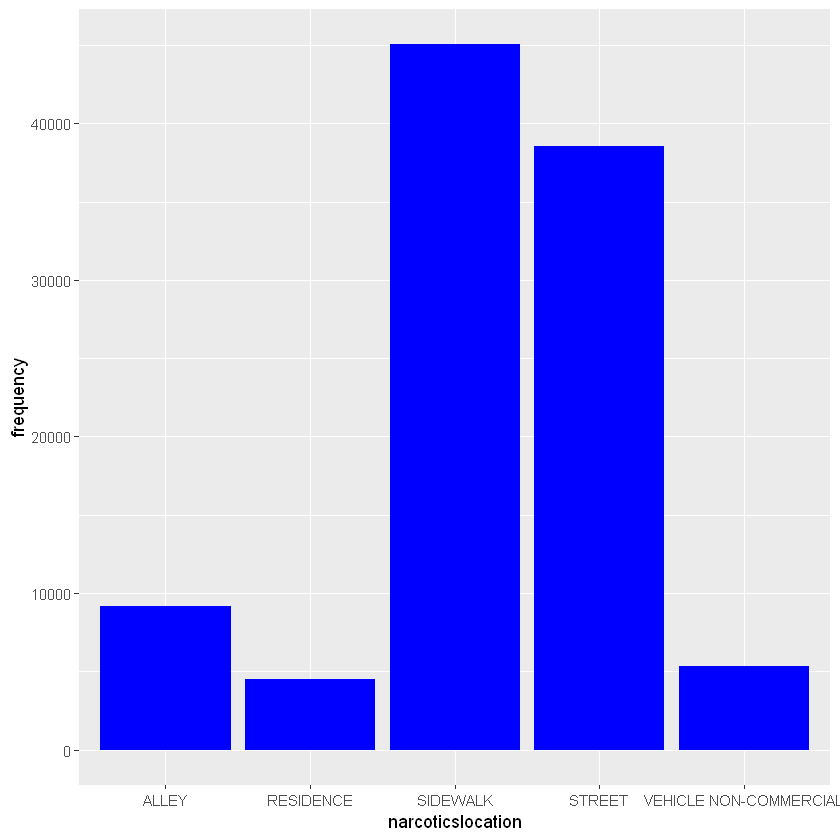

In [47]:
##E.2. narcotics top locations
narcoticsloc = sqldf("Select LocationDescription as narcoticslocation, 
                  count(*) as frequency 
                  from data 
                  where PrimaryType='NARCOTICS'
                   group by LocationDescription
                   order by frequency DESC
                limit 5")

ggplot(narcoticsloc,aes(narcoticslocation,frequency))+geom_bar(stat='identity',fill="blue")

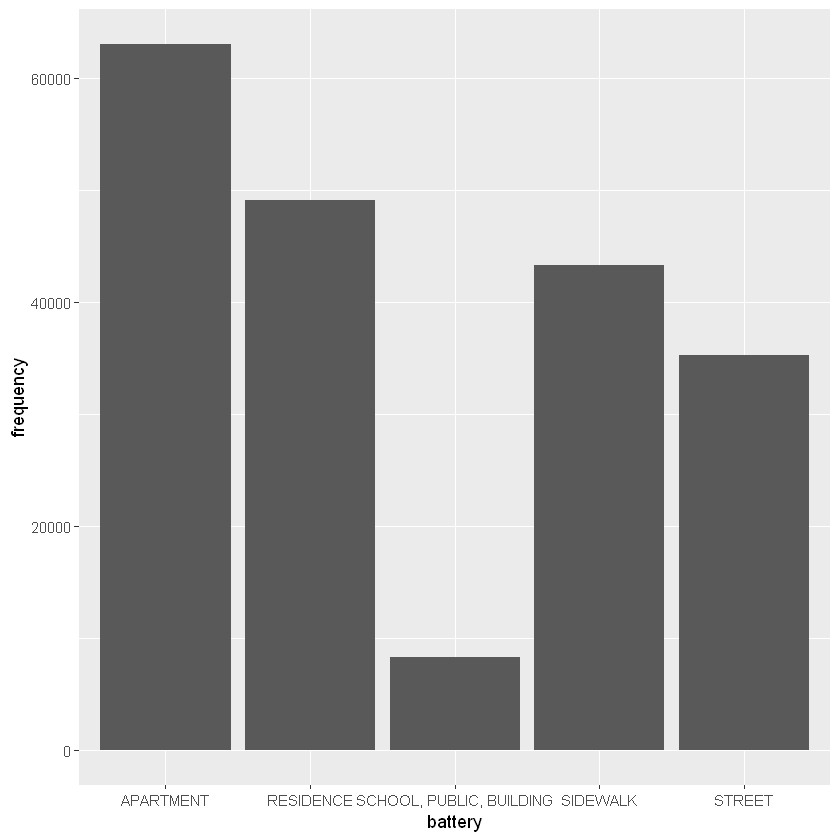

In [48]:
##E.3. battery top locations
batteryloc = sqldf("Select LocationDescription as battery, 
                  count(*) as frequency 
                  from data 
                  where PrimaryType='BATTERY'
                   group by LocationDescription
                   order by frequency DESC
                limit 5")
ggplot(batteryloc,aes(battery,frequency))+geom_bar(stat='identity')

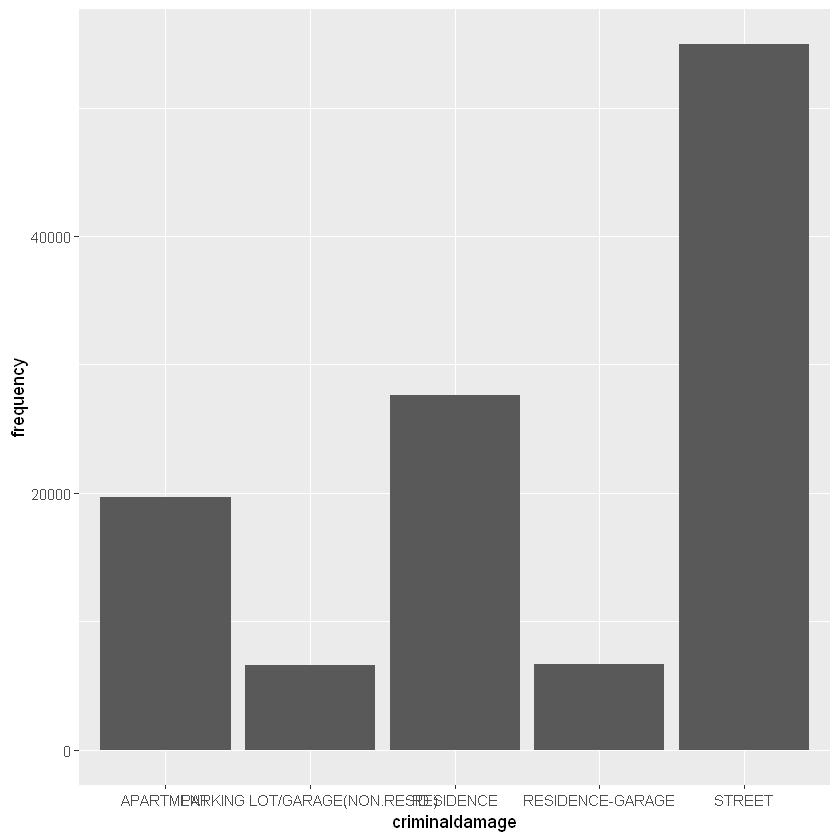

In [76]:
                ##E.4. criminal damage top locations
criminaldamageloc = sqldf("Select LocationDescription as criminaldamage, 
                  count(*) as frequency 
                  from data 
                  where PrimaryType='CRIMINAL DAMAGE'
                   group by LocationDescription
                   order by frequency DESC
                limit 5")
ggplot(criminaldamageloc,aes(criminaldamage,frequency))+geom_bar(stat='identity')

In [77]:
##F.Leaflet mapping points 
##F.0.adding districts of police
bnd <- readOGR("pd.geojson")

OGR data source with driver: GeoJSON 
Source: "C:\Users\Spectre\Desktop\Chicago\crimes\pd.geojson", layer: "pd"
with 25 features
It has 2 fields


In [78]:
library(leaflet)

In [84]:
m<-leaflet() %>% addProviderTiles(providers$Stamen.Toner) %>% addPolygons(data=bnd, color="#690000", weight=1,)
m

HTML widgets cannot be represented in plain text (need html)

In [80]:
##F.1. highest theft areas
maptheft = sqldf("Select Latitude, Longitude 
                  from data 
                  where Year=2016 and 
                  PrimaryType='THEFT' 
                  and LocationDescription='STREET' and 
                  Arrest=1")

In [82]:
maptheft

Latitude Longitude
1   41.83634 -87.62674
2   41.73398 -87.61931
3   41.90862 -87.66764
4   41.92102 -87.69730
5   41.90465 -87.76103
6   41.91026 -87.69293
7   41.82970 -87.64674
8   41.88218 -87.65205
9   41.79496 -87.73229
10  41.95411 -87.72763
11  41.81906 -87.70041
12  41.69400 -87.61828
13  41.89085 -87.62910
14  41.91053 -87.74702
15  41.79404 -87.63050
16  41.96715 -87.66314
17  41.70274 -87.53597
18  41.74960 -87.71971
19  41.78052 -87.57701
20  41.78230 -87.58787
21  41.89959 -87.72011
22  41.91327 -87.65133
23  41.95265 -87.65633
24  41.79449 -87.72810
25  41.93884 -87.74616
26  41.89199 -87.61146
27  41.94384 -87.64938
28  41.90873 -87.73631
29  41.88226 -87.76367
30  41.80615 -87.67342
... ...      ...      
212 41.78891 -87.70465
213 41.93262 -87.71322
214 41.72601 -87.64455
215 41.83051 -87.66477
216 42.01937 -87.67118
217 41.70351 -87.70737
218 41.77581 -87.71034
219 41.72404 -87.64328
220 41.90439 -87.67385
221 41.69450 -87.68439
222 41.69500 -87.68375
223 41.92036 -87.66316
224 41.88429 -87.66166
225 41.85395 -87.62224
226 41.84813 -87.64075
227 41.77217 -87.70298
228 41.95408 -87.74177
229 41.96959 -87.67420
230 42.01369 -87.67882
231 41.73871 -87.55268
232 41.74761 -87.56860
233 41.88452 -87.62210
234 41.88122 -87.72568
235 41.93091 -87.70128
236 41.75660 -87.56148
237 41.90990 -87.72571
238 41.75459 -87.56508
239 41.85237 -87.70284
240 41.90846 -87.69042
241 41.75085 -87.57353

In [83]:
m %>% addCircleMarkers(lng=maptheft$Longitude,lat=maptheft$Latitude,radius=0)

HTML widgets cannot be represented in plain text (need html)

In [85]:
##F.2. highest criminal damages areas
mapcd = sqldf("Select Latitude, Longitude 
                  from data 
                  where Year=2016 and 
                  PrimaryType='CRIMINAL DAMAGE' 
                  and LocationDescription='STREET' and 
                  Arrest=1")
m %>% addCircleMarkers(lng=mapcd$Longitude,lat=mapcd$Latitude,radius=0,col="black")

HTML widgets cannot be represented in plain text (need html)

In [86]:
##F.3. highest narcotics areas
mapnarc = sqldf("Select Latitude, Longitude 
                  from data 
                  where Year=2016 and 
                  PrimaryType='NARCOTICS' 
                  and LocationDescription='SIDEWALK' and 
                  Arrest=1")
m %>% addCircleMarkers(lng=mapnarc$Longitude,lat=mapnarc$Latitude,radius=0,col="purple")

HTML widgets cannot be represented in plain text (need html)

In [87]:
##F.4. highest battery areas
mapBAT = sqldf("Select Latitude, Longitude 
                  from data 
                  where Year=2016 and 
                  PrimaryType='BATTERY' 
                  and LocationDescription='APARTMENT' and 
                  Arrest=1")
m %>% addCircleMarkers(lng=mapBAT$Longitude,lat=mapBAT$Latitude,radius=0,col="red")

HTML widgets cannot be represented in plain text (need html)